In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier

In [2]:
def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

特征：   花萼长度  +  花萼宽度 	预测正确数目： 123 	准确率: 82.00%
特征：   花萼长度  +  花瓣长度 	预测正确数目： 143 	准确率: 95.33%
特征：   花萼长度  +  花瓣宽度 	预测正确数目： 144 	准确率: 96.00%
特征：   花萼宽度  +  花瓣长度 	预测正确数目： 143 	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度 	预测正确数目： 144 	准确率: 96.00%
特征：   花瓣长度  +  花瓣宽度 	预测正确数目： 145 	准确率: 96.67%


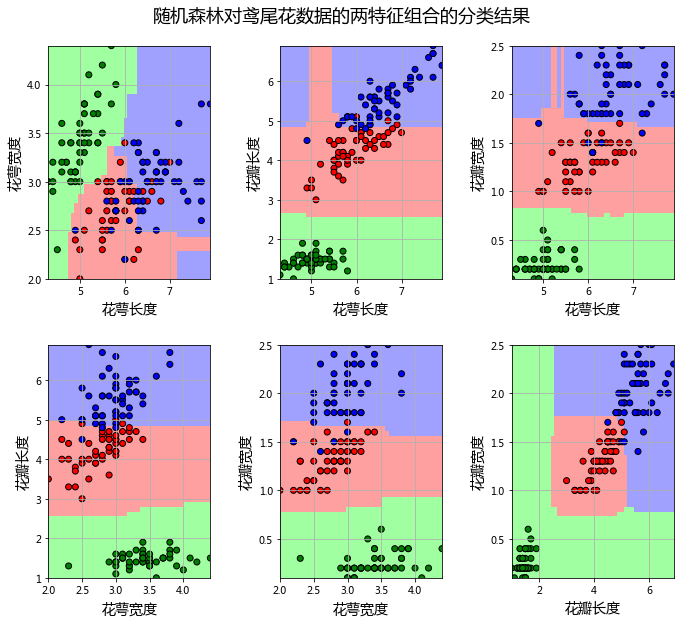

In [3]:
if __name__ == "__main__":
    # mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
    # mpl.rcParams['axes.unicode_minus'] = False

    path = '../8.Regression/iris.data'  # 数据文件路径
    data = pd.read_csv(path, header=None)
    x_prime = data[range(4)]
    y = pd.Categorical(data[4]).codes

    feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
    plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
    for i, pair in enumerate(feature_pairs):
        # 准备数据
        x = x_prime[pair]

        # 随机森林
        clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=3)
        clf.fit(x, y.ravel())

        # 画图
        N, M = 50, 50  # 横纵各采样多少个值
        x1_min, x2_min = x.min()
        x1_max, x2_max = x.max()
        t1 = np.linspace(x1_min, x1_max, N)
        t2 = np.linspace(x2_min, x2_max, M)
        x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
        x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

        # 训练集上的预测结果
        y_hat = clf.predict(x)
        y = y.reshape(-1)
        c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
        print '特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],
        print '\t预测正确数目：', c,
        print '\t准确率: %.2f%%' % (100 * float(c) / float(len(y)))

        # 显示
        cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
        cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
        y_hat = clf.predict(x_test)  # 预测值
        y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
        plt.subplot(2, 3, i+1)
        plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
        plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
        plt.xlabel(iris_feature[pair[0]], fontsize=14)
        plt.ylabel(iris_feature[pair[1]], fontsize=14)
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.grid()
    plt.tight_layout(2.5)
    plt.subplots_adjust(top=0.92)
    plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)
    plt.show()